# EP 3. NumPy Study
- NumPy란 무엇일까
- NumPy가 왜 필요할까
- NumPy 배워보기
- Wrap-Up

In [1]:
import numpy as np
np.__version__

'1.16.1'

# NumPy 란 무엇일까

1. 일반 목적용 프로그래밍 언어를 통계용 프로그래밍 언어처럼 쓸 수 있게 해 줌
  1. 통계나 수치분석에 적합한 자료형을 제공함
  1. 통계나 수치분석에 적합한 함수들을 제공함
1. 느려터진 파이썬에 숨통이 트일만한 속도를 제공해줌
1. 솔까말, 넘파이 없었으면 파이썬 ㅈㅂ

<img src="machine_learning_libraries.png"/>

# NumPy 가 왜 필요할까?

## 통계용 언어와 일반 목적용 언어의 근본적인 차이점  
- [1, 2, 3] + [4, 5, 6]의 값은?
- [2, 4, 6] + 2 의 값은?

In [2]:
# 일반 목적용 Python은 이렇게 답한다

a = [1, 2, 3]
b = [4, 5, 6]

c = a + b
print(c)

c = c + [2]
print(c)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 2]


## 상황에 과몰입하기

어느 날 갑자기 상무님이 부르셨다  
우리 담당의 LCP 평가의 산출 근거가 담긴 엑셀 파일을 주시며,  
각 산출 근거별로 평균 값을 지금 이 자리에서 알고 싶다고 하셨다.  

산출 근거는 개발언어/모델링/근속연차 등등 총 20가지의 항목이 있었고  
담당 인원은 200명이었다.  
어찌어찌해서 엑셀 자료를 파이썬 2차원 데이터로까지는 로딩할 수 있었는데,  
과연 어떻게 평균을 구할 수 있을까!  

위기탈출 넘파이!!  

In [3]:
data = []
np.random.seed(0)

for cnt in range(200):
    data.append(list(np.random.randint(100, size=20)))
    
for row in data:
    print(row)

[44, 47, 64, 67, 67, 9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39, 87, 46, 88]
[81, 37, 25, 77, 72, 9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49, 29, 19, 19, 14]
[39, 32, 65, 9, 57, 32, 31, 74, 23, 35, 75, 55, 28, 34, 0, 0, 36, 53, 5, 38]
[17, 79, 4, 42, 58, 31, 1, 65, 41, 57, 35, 11, 46, 82, 91, 0, 14, 99, 53, 12]
[42, 84, 75, 68, 6, 68, 47, 3, 76, 52, 78, 15, 20, 99, 58, 23, 79, 13, 85, 48]
[49, 69, 41, 35, 64, 95, 69, 94, 0, 50, 36, 34, 48, 93, 3, 98, 42, 77, 21, 73]
[0, 10, 43, 58, 23, 59, 2, 98, 62, 35, 94, 67, 82, 46, 99, 20, 81, 50, 27, 14]
[41, 58, 65, 36, 10, 86, 43, 11, 2, 51, 80, 32, 54, 0, 38, 19, 46, 42, 56, 60]
[77, 30, 24, 2, 3, 94, 98, 13, 40, 72, 19, 95, 72, 26, 66, 52, 67, 61, 14, 96]
[4, 67, 11, 86, 77, 75, 56, 16, 24, 29, 21, 25, 80, 60, 61, 83, 33, 32, 70, 85]
[31, 13, 71, 56, 24, 79, 41, 18, 40, 54, 79, 11, 38, 93, 1, 95, 44, 88, 24, 67]
[82, 3, 76, 35, 86, 61, 69, 87, 43, 32, 11, 84, 10, 54, 37, 28, 2, 27, 83, 89]
[23, 53, 51, 46, 20, 53, 29, 67, 35, 39, 9, 73, 41,

In [9]:
#%%timeit

sum_each = []
first_round = True

for row in data:
    
    if first_round:
        for col in range(20):
            sum_each.append(row[col])
            
        first_round = False
        
    else:
        for col in range(20):
            sum_each[col] += row[col]

total_observ = len(data)
mean_each = []
for col in range(20):
    mean_each.append(sum_each[col]/total_observ)


In [10]:
mean_each
for i, m in enumerate(mean_each):
    print(f'{i+1} th mean: {m}')

1 th mean: 47.83
2 th mean: 46.48
3 th mean: 49.675
4 th mean: 49.325
5 th mean: 46.52
6 th mean: 45.265
7 th mean: 50.375
8 th mean: 48.04
9 th mean: 48.195
10 th mean: 49.79
11 th mean: 46.185
12 th mean: 49.46
13 th mean: 47.865
14 th mean: 48.88
15 th mean: 46.705
16 th mean: 47.33
17 th mean: 52.04
18 th mean: 53.13
19 th mean: 51.905
20 th mean: 49.25


In [11]:
np.random.seed(0)
data = np.random.randint(100, size=(200,20))

In [12]:
%%timeit

mean_each = np.add.reduce(data)/200

6.63 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
for i, avg in enumerate(mean_each):
    print(f'{i+1} th mean: {avg}')

1 th mean: 47.83
2 th mean: 46.48
3 th mean: 49.675
4 th mean: 49.325
5 th mean: 46.52
6 th mean: 45.265
7 th mean: 50.375
8 th mean: 48.04
9 th mean: 48.195
10 th mean: 49.79
11 th mean: 46.185
12 th mean: 49.46
13 th mean: 47.865
14 th mean: 48.88
15 th mean: 46.705
16 th mean: 47.33
17 th mean: 52.04
18 th mean: 53.13
19 th mean: 51.905
20 th mean: 49.25


# NumPy 배워보기

## 1. list != array
__리스트는 편하지만 비효율적이다, 더 나은 데이터 타입을 달라!__

<img src="array_vs_list.png"/>

In [ ]:
L = list([int(1), 'a', True, None, 3.45, 1])

for item in L:
    print(hex(id(item)), '-', item)

In [ ]:
import array
A = array.array('i', [1, 2, 3, 4, 5])
print(A)

for item in A:
    print(hex(id(item)))

## 2. 기본적인 NumPy 배열 생성등

In [ ]:
np.random.seed(0)
x = np.random.randint(10, size=10)
x

In [ ]:
x[0], x[-1], x[::2]

In [ ]:
y = np.random.randint(10, size=(4,3))
y

In [ ]:
y[0][2], y[3][-2], y[3, 2], y[:2, ::2]

### 그런데, subarray의 경우, copy가 아니라 view를 돌려주는 것!

In [ ]:
y_sub = y[:2, ::2]
y_sub[0, 1] = 20000
print(y_sub)
print(y)

In [ ]:
y_reshp = y.reshape((1,y.size))
y_reshp

## 3. UFunc!

In [ ]:
import numpy as np

def compute_reciprocals(values):
    
    output = np.empty(len(values))
    for i, val in enumerate(values):
        output[i] = 1.0 / val
        
    return output

np.random.seed(0)
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)

In [ ]:
%timeit compute_reciprocals(big_array)

In [ ]:
%timeit (1.0 / big_array)

## 4. Aggregation

%%timeit

mean_each = np.mean(data, axis=0)

for i, avg in enumerate(mean_each):
    print(f'{i+1} th mean: {avg}')

In [6]:
L = np.random.random(100)
L

array([0.10325322, 0.51909894, 0.09680322, 0.88976214, 0.06184478,
       0.44969443, 0.28469407, 0.15486942, 0.78383669, 0.7149324 ,
       0.14594789, 0.63276564, 0.79255517, 0.77333222, 0.0922796 ,
       0.68551272, 0.71602392, 0.86216627, 0.50804434, 0.461094  ,
       0.96511632, 0.79651226, 0.55873099, 0.33061707, 0.845238  ,
       0.45543639, 0.09268519, 0.45490427, 0.8719684 , 0.44828215,
       0.01434915, 0.61148532, 0.99583   , 0.81724858, 0.61723795,
       0.91439889, 0.81358168, 0.49863935, 0.59122029, 0.73129281,
       0.84642616, 0.0581764 , 0.77480386, 0.44750344, 0.66079856,
       0.76463301, 0.53950193, 0.15851485, 0.40952683, 0.07687299,
       0.68930069, 0.95370618, 0.79525281, 0.38978642, 0.5842915 ,
       0.30420068, 0.5410456 , 0.30072691, 0.73832476, 0.25934151,
       0.96402039, 0.66194873, 0.06877785, 0.01077776, 0.99704634,
       0.22050558, 0.31256275, 0.20841401, 0.92810177, 0.65201286,
       0.50438632, 0.55765081, 0.31787285, 0.614175  , 0.41960

In [7]:
sum(L), np.sum(L)

(55.05536812723177, 55.05536812723177)

In [8]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

89.5 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
390 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit min(big_array)
%timeit np.min(big_array)

65.9 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
413 µs ± 6.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
M = np.random.random((3, 4))
M

array([[0.45725109, 0.77091368, 0.21989855, 0.94436162],
       [0.66770296, 0.80260102, 0.8763563 , 0.55746492],
       [0.33942389, 0.79644905, 0.80220316, 0.39579005]])

In [11]:
M.sum(), M.min(axis=0), M.max(axis=1)

(7.630416275059947,
 array([0.33942389, 0.77091368, 0.21989855, 0.39579005]),
 array([0.94436162, 0.8763563 , 0.80220316]))

## 5. Broadcasting

In [12]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [13]:
a + 5

array([5, 6, 7])

<img src="matrix_stretch.png"/>

### Rules of Broadcasting

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [2]:
# Rule 1

import numpy as np

M = np.ones((2, 3))   # 2차원
a = np.arange(3)      # 1차원

M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [3]:
# Rule 2

a = np.arange(3).reshape((3, 1))
b = np.arange(3)

a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [5]:
# Rule 3

M = np.ones((3, 2))
a = np.arange(3)

M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [6]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [10]:
print(a.shape)
print(a[:, np.newaxis].shape)

(3,)
(3, 1)


> 안되면 되게하라

### Broadcasting in Practice

In [12]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
Xmean

array([0.46468491, 0.39456854, 0.62657977])

In [15]:
X_centered = X - Xmean
X_centered.mean(0)

array([-4.44089210e-17,  1.11022302e-17,  2.22044605e-17])

---

In [17]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)

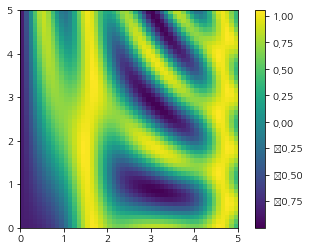

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## 6. Comparison, Masks, and Boolean Logic

Boolean masks to examine and manipulate vlaues within NumPy arrays

In [19]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0      # 1/10mm -> inches
inches.shape

(365,)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()    # set plot style

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

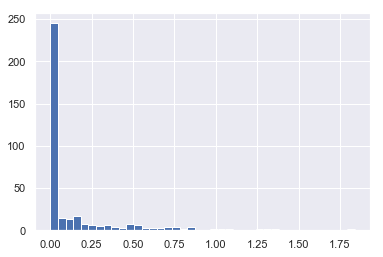

In [21]:
plt.hist(inches, 40)

---

In [22]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [23]:
x > 3

array([False, False, False,  True,  True])

In [24]:
x == 3

array([False, False,  True, False, False])

In [25]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [26]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [27]:
np.random.seed(0)
x = np.random.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [29]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

#### 1 count_nonzero
True의 개수를 세기 위해서 count_nonzero를 쓸 수 있습니다.  
실은 이런 것은 True가 1로 취급되는 것과도 관계가 있습죠  

In [30]:
np.count_nonzero(x < 6)

8

In [37]:
True == -1, True == 0, True == 1, True == 2

(False, False, True, False)

In [38]:
False == -1, False == 0, False == 1, False == 2

(False, True, False, False)

#### 2 np.sum( condition )

조건을 만족하는 셀을 1로 보고 다 합한 것  
앞의 counting nonzero values와 달리, 행렬 연산을 가미할 수 있다는 장점 있음!

In [40]:
np.sum(x < 6)

8

In [44]:
# 각 행에 6보다 작은 수가 몇 개씩 있는가?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [46]:
np.any(x > 8), np.all(x < 10), np.all(x == 6)

(True, True, False)

참고로 any와 all은 파이썬 개발자들이 or 와 and 쓰기도 귀찮아해서 전역함수로도 있습죠  

아 그리고 주의사항! numpy array 타입에 대한 파이선 빌트인 함수 any, all, sum은 경우에 따라 오동작 할 수 있다고 합니다. 따라서 일관성 있게, 넘파이 객체에는 넘파이 오퍼레이션을!

In [53]:
age, birthmonth, sex = 29, 12, 'T'

in_20s = 20 <= age <= 29
born_in_winter = birthmonth in [12, 1, 2]
sexual_minority = sex in 'LGBT'

# if any of conditions is met,
in_20s, born_in_winter, sexual_minority

(True, True, True)

In [57]:
# 그런데말입니다, 게으른 파이썬 개발자들은,
or_oper = in_20s or born_in_winter or sexual_minority
any_oper = any( [in_20s, born_in_winter, sexual_minority] )
print(or_oper, any_oper)

True True


In [58]:
# or 대신에 and 로 연결된 조건 판별식은
and_oper = in_20s and born_in_winter and sexual_minority
all_oper = all([in_20s, born_in_winter, sexual_minority])
print(and_oper, all_oper)

True True


### Boolean Operation

In [60]:
np.sum( (inches > 0.5) & (inches < 1) )

29

In [62]:
np.sum( inches > 0.5 & inches < 1 )

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [63]:
0.7 > 0.5 and 0.7 < 1

True

In [64]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [66]:
not 0.7 < 0.5 and 0.7 < 1

True

& : np.bitwise_and  
^ : np.bitwise_xor  
| : np.bitwise_or  
~ : np.bitwise_not

### Boolean Arrays and Masks

In [67]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [68]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [69]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [70]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


### Aside: Using the keywords and/or versus the operators &/| 

In [73]:
bool(1), bool(42), bool(0)

(True, True, False)

In [77]:
bool(42 and 0), bool(42 or 0)

(False, True)

In [81]:
bool(1), bool(2), bool(1 and 2), bool(1 & 2)

(True, True, True, False)

In [82]:
bin(1), bin(2), bin(1 & 2)

('0b1', '0b10', '0b0')

## 7. Fancy Indexing

Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indeices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values

In [92]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [93]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [94]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [95]:
ind = np.array([[3, 7],
                [4, 5]
               ])
x[ind]

array([[71, 86],
       [60, 20]])

In [96]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [98]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [100]:
row = np.array([0, 1, 2])
col = np.array([2, 1 ,3])
X[row, col]

array([ 2,  5, 11])

Computation on Arrays: Broadcasting 에서 배운 바를 응용하면,  
Sub-Array를 가져오는 신박한 방법을 추가할 수 있다  

In [101]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [102]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [103]:
col

array([2, 1, 3])

In [104]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### Combined Indexing
이제 응용편입니다. 다른 데서 배운 Operation들과 엮어 봅시다

In [106]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


먼저 파이썬의 기본적인 리스트 오퍼레이션

In [110]:
# 리스트 인덱싱

X[2, [2, 0, 1]]

array([10,  8,  9])

In [112]:
# 리스트 슬라이싱!

X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [113]:
# 마스킹!

mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Example: Selecting Random Points

D차원에 분포된 N개의 점들을 나타내는 N * D 행렬이 있다고 할 때, 2차원 정규분포를 통해 포인트들을 추출해 내보기

In [114]:
mean = [0, 0]
cov = [
    [1, 2],
    [2, 5]
]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [121]:
X[:5]

array([[-0.644508  , -0.46220608],
       [ 0.7376352 ,  1.21236921],
       [ 0.88151763,  1.12795177],
       [ 2.04998983,  5.97778598],
       [-0.1711348 , -2.06258746]])

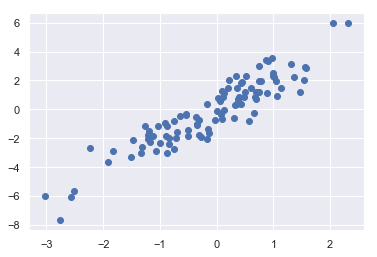

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

이제 20개의 임의의 점들을 추출해보겠습니다. 반복을 허용하지 않고 20개의 인덱스를 고른 다음, 원래 배열에서 해당하는 값들을 가져옵니다

In [123]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([26, 48, 10, 66, 96,  7, 91,  2, 90, 33, 22, 78, 75, 70, 82, 92, 16,
       13, 21, 45])

In [124]:
selection = X[indices]   # Fancy indexing here!
selection.shape

(20, 2)

우리가 고른 임의 샘플이 도드라져 보이게, 아까의 평면에다 선택된 샘플은 원으로 한 번 감싸줍니다.

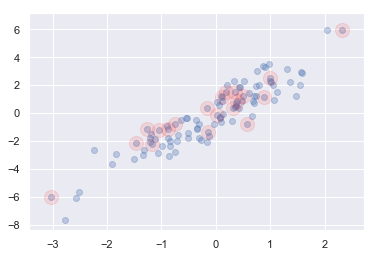

In [131]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=200, alpha=0.1);

> 뭣이 중헌디?

인공지능의 훈련은 보통 아래와 같습니다.
- 수집한 데이터 셋을 훈련용과 테스트용으로 구분합니다. (경우에 따라, 훈련/검증/테스트로 분할 하기도 합니다)
- 훈련용 세트를 바탕으로 목표한 수준의 정확도에 도달할 때까지 반복학습 시킵니다
- 혹시나 과적합(overfitting) 되지는 않았는지, 일반화된 환경에서 설명력이 있는지 테스트 세트를 통해 다시 검사합니다.

따라서 테스트 세트와 훈련용 세트가 잘 나뉘는 것이 중요하며, 특히나 테스트 세트가 치우쳐(biased) 있다면, 과적합이나 일반화 검사라는 취지에서 어긋나기에, 임의의 데이터를 추출하는 기법이 중요하고, __넘파이를 사용하면 이렇게나 간단하답니다?__

### Modifying Values with Fancy Indexing

단순히 부분 배열에 접근할 때 뿐만 아니라 값을 수정하는데도 사용할 수 있습니다.

In [132]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print([x])

[array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])]


In [133]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


__주의할 것!__ 예상치 못한 결과를 가져올 수 있음

In [134]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


여기서 무슨 일이 벌어진 것일까요? 작성자는 뭘 의도했지요? 4는 어디있나요?
```
먼저 x[0]에 4가 대입되었다가
다시 x[0]에 6이 대입되었다
```

In [135]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

아니 그럼 얘는 왜이런데요? 예측대로라면,
```
x[2] 에는 1이
x[3] 에는 2가
x[4] 에는 3이 할당되어야?
```

그러나 현실은 이렇습니다.
```
x[i] += 1은 x[i] = x[i] + 1 인데
우변의 x[i]가 연산 전에 0으로 확정된 상태에서
x[4] = 0 + 1을 세번한 꼴입니다.
```

> 마포대교는 무너졌냐?

그럼 대안은 어떻게 해야할까요?

In [137]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


여기서 .at() 메소드가 

### Example: Binning Data

히스토그램 그릴때 효율적으로 bin 데이터를 만들 수 있습니다. 만약 1000개의 값이 있고 빨리 어느 bin에 넣을 것인지 찾아야 한다면, ...

In [138]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

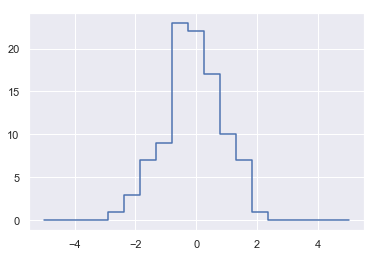

In [139]:
# plot the results
plt.plot(bins, counts, linestyle='steps')

물론 사실 현실에선 Matplotlib의 plt.hist() 기능을 사용하시는게 일반적이지요. 위의 작업들은 예시로 듭니다

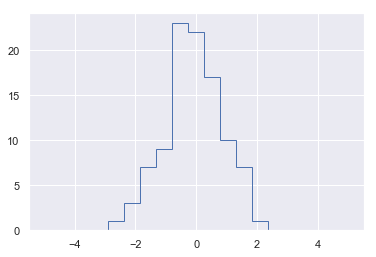

In [140]:
plt.hist(x, bins, histtype='step');

---
대체 무슨 일이 벌어지고 있는지 하나씩 따라가봅시다

In [168]:
x, x.min(), x.max()

(array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
         1.35624003, -0.07201012,  1.0035329 ,  0.3

In [150]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [164]:
bins_range = list(zip(bins[:-1], bins[1:]))
for idx, b_rng in enumerate(bins_range):
    print(idx, b_rng)

0 (-5.0, -4.473684210526316)
1 (-4.473684210526316, -3.947368421052632)
2 (-3.947368421052632, -3.4210526315789473)
3 (-3.4210526315789473, -2.8947368421052633)
4 (-2.8947368421052633, -2.368421052631579)
5 (-2.368421052631579, -1.8421052631578947)
6 (-1.8421052631578947, -1.3157894736842106)
7 (-1.3157894736842106, -0.7894736842105265)
8 (-0.7894736842105265, -0.2631578947368425)
9 (-0.2631578947368425, 0.2631578947368416)
10 (0.2631578947368416, 0.7894736842105257)
11 (0.7894736842105257, 1.3157894736842106)
12 (1.3157894736842106, 1.8421052631578947)
13 (1.8421052631578947, 2.3684210526315788)
14 (2.3684210526315788, 2.894736842105263)
15 (2.894736842105263, 3.421052631578947)
16 (3.421052631578947, 3.947368421052632)
17 (3.947368421052632, 4.473684210526315)
18 (4.473684210526315, 5.0)


In [142]:
np.zeros_like(bins)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [143]:
len(np.zeros_like(bins))

20

In [148]:
np.searchsorted(bins, x)

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

In [149]:
np.searchsorted(bins, x).shape

(100,)

In [160]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

In [175]:
b = np.searchsorted(bins, x)
b[b==12].shape

(10,)

In [176]:
c = x[0.7894736842105257 <= x]
d = c[c < 1.3157894736842106]
d



array([0.82254491, 1.05712223, 1.03099952, 0.93128012, 0.97554513,
       0.81252582, 1.0035329 , 0.8219025 , 0.91540212, 0.96864499])

---
다시 본론으로 돌아와서

In [177]:
print("NumPy routin:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routin:
25.7 µs ± 905 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.1 µs ± 96.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


놀랍게도 우리가 만든 1줄짜리 코드가 NumPy의 함수보다 빠른데, 그 근본적인 이유는 np.histogram은 여러 케이스에 유연하게 대응하기 위해 유연하게 설계되었고, 대량의 수를 처리할때 빠르도록 설계되었기 때문입니다

In [178]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
69.4 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
124 ms ± 974 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


이렇게 보면, 어떤 알고리즘의 효율성은 절대 단순한 문제가 아닙니다. 어떤 알고리즘이 대량의 자료에 효율적이라는 뜻은 작은 데이터셋에서도 효율을 보장할 수 있지 않기 때문입니다. 역도 성립합니다.   

파이썬의 데이터 집중형 어플리케이션 만들때는 np.histogram과 같은 일반적인 편리한 함수들을 알아두면서, 또한 경우에 따라서 필요할 때에는 직접 저레벨의 기능을 활용할 줄도 알아야 하는 것이지요. 아, 피곤하네...

## 8. Sorting

## 9. Structured Array

# Wrap-Up

넘파이는
- 수치 데이터에 한해서
- 더 효율적인 데이터 타입과
- 더 빠른 집합처리를 가능케 하여

일반목적용 프로그래밍 언어인 파이썬을  
통계학 프로그래밍 언어까지 넘볼 수 있게 해주었다.  

보통은 통계용 전문 프로그래밍 언어가 따로 있어 왔다.  
현재도 R, Julia 등이 파이썬의 강력한 경쟁자이다.   

다음 이 시간에는,  
- 수치 데이터에 한해서가 아니라 문자/카테고리 데이터까지 포함하여
- np.array보다 더 일반화된 tabular 데이터 처리를 위한 타입을 제공하는

Pandas에 대해서 알아볼 예정이다